# Interpolação por Spline Cúbica

A interpolação spline cúbica é método usado para criar uma função por partes, função matemática que é composta por diferentes expressões em diferentes intervalos do domínio. Os intervalos nesse casos são definidos a partir do conjunto de dados organizados em ordem crescente nesses intervalos construimos uma função polinomial de terceiro grau para representação os valores entre seus limites.

## Definição

Dados um conjuntos de $n$ pontos de dados $(x_{i},y_{i})$ onde $x_{0}<x_{1}<\cdots<x_{n-2}<x_{n-1}$ a spline cúbica $S(x)$ é uma função no formanto:

$S(x)=\begin{cases}
s_{0} = a_{0}+b_{0}(x-x_{0})+c_{0}(x-x_{0})^{2}+d_{0}(x-x_{0})^{3} & x_{0}\leq x \leq x_{1} \\
\vdots & \vdots \\
s_{i} = a_{i}+b_{i}(x-x_{i})+c_{i}(x-x_{i})^{2}+d_{i}(x-x_{i})^{3} & x_{i-1}\leq x \leq x_{i} \\
\vdots & \vdots \\
s_{n-2} = a_{n-2}+b_{n-2}(x-x_{n-2})+c_{n-2}(x-x_{n-2})^{2}+d_{n-2}(x-x_{n-2})^{3} & x_{n-2}\leq x \leq x_{n-1}
\end{cases}
$

São condições de contorno para sua existência:

|Ponto|Condição - 01|Condição - 02|Condição - 03|Condição - 04|
|:-:|:-:|:-:|:-:|:-:|
|$0$|$S_{0}(x_{0}) = y_{0}$|$S_{0}(x_{1}) = y_{1}$|$S_{0}^{'}(x_{1}) = S_{1}^{'}(x_{1})$|$S_{0}^{''}(x_{1}) = S_{1}^{''}(x_{1})$|
|$1$|$S_{1}(x_{1}) = y_{1}$|$S_{1}(x_{2}) = y_{2}$|$S_{1}^{'}(x_{2}) = S_{2}^{'}(x_{2})$|$S_{1}^{''}(x_{2}) = S_{2}^{''}(x_{2})$|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|$i-1$|$S_{i-1}(x_{i-1}) = y_{i-1}$|$S_{i-1}(x_{i}) = y_{i}$|$S_{i-1}^{'}(x_{i}) = S_{i}^{'}(x_{i})$|$S_{i-1}^{''}(x_{i}) = S_{i}^{''}(x_{i})$|
|$i$|$S_{i}(x_{i}) = y_{i}$|$S_{i}(x_{i+1}) = y_{i+1}$|$S_{i}^{'}(x_{i+1}) = S_{i+1}^{'}(x_{i+1})$|$S_{i}^{''}(x_{i+1}) = S_{i+1}^{''}(x_{i+1})$|
|$i+1$|$S_{i+1}(x_{i+1}) = y_{i+1}$|$S_{i+1}(x_{i+2}) = y_{i+2}$|$S_{i+1}^{'}(x_{i+2}) = S_{i+2}^{'}(x_{i+2})$|$S_{i+1}^{''}(x_{i+2}) = S_{i+2}^{''}(x_{i+2})$|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|$n-3$|$S_{n-3}(x_{n-3}) = y_{n-3}$|$S_{n-3}(x_{n-2}) = y_{n-2}$|$S_{n-3}^{'}(x_{n-2}) = S_{n-2}^{'}(x_{n-2})$|$S_{n-3}^{''}(x_{n-2}) = S_{n-2}^{''}(x_{n-2})$|
|$n-2$|$S_{n-2}(x_{n-2}) = y_{n-2}$|$S_{n-2}(x_{n-1}) = y_{n-1}$|----|----|
|$n-1$|----|----|----|----|

Quando temos $n$ pontos a spline e composta por $n-1$ equações cada equação que compõem a spline apresentam quatro paramêtros, assim temos um total de $4(n-1)=4n-4$ paramêtros para conseguimos determinar a spline. As quatro condições impostas nos fornecem um total de $2(n-1)+2(n-2)=4n-6$ relações entre as equações. Observamos que $4n-4 \neq 4n-6$, assim não temos como determinar todos os paramêtros, isso nos deixa com a necessidade de determinar mais duas relações. Por isso impomos um das seguintes condições de fronteira:

1. As derivadas nos pontos finais são conhecidas, condições de contorno fixada.
   > $s_{0}^{'}(x_{0})=k_{1}$ e $s_{n-2}^{'}(x_{n-1})=k_{2}$
2. As segundas derivadas nos pontos finais são conhecidas, quando $s_{0}^{''}(x_{0})=s_{n-1}^{''}(x_{n-1})=0$ chamamos de condição de contorno natural ou simples
   > $s_{0}^{''}(x_{0})=k_{1}$ e $s_{n-2}^{''}(x_{n-1})=k_{2}$

Quando dispomosd de uma dessas condições possuímos o número toda de equações para determinar a spline, longe disso somos capazas de elaborar outras condições de fronteiras para obtermos outros modelos de interpolação que solucionar essa modelagem em questão.

**Referências**
* [Interpolação cúbica segmentada - spline](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/i1-interpolacao_cubica_segmentada_-_spline.html)
* [Cubic Spline Interpolation](https://en.wikiversity.org/wiki/Cubic_Spline_Interpolation)
* [Interpolaçõa Polinomial Splines Cúbicos](https://www.ime.usp.br/mat/2458/textos/splines.pdf)

## Observação

Destamos que poderiamos recorrer diretamente a biblioteca [scipy](https://scipy.org/) por contém o método [`scipy.interpolate.CubicSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) que opera diretamente com esse método de interpolação. Recorre o scipy para modelagem desse tipo de interpolação se mostra muito mais eficiente em diverso níveis, diverso modelos de spline e velocidade no processamento, esse notebook trata somente de uma dos métodos de interpolação por Spline Cúbica de condição natural.

# Funções

## Coeficientes da Matriz de solução

Função que gera a matriz dos coeficientes dos polinômios $s_{i}$ que formam a função definida por partes.

In [1]:
def condicao_um (x = []):
    '''
    Gera os coeficientes da primeira condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []

    #Gerar os coeficientes de cada subfunção da função por parte
    j = 0
    for _ in range(quantidade_de_equacoes):
        k = [0 for _ in range(4*quantidade_de_equacoes)]
        k[j] = 1
        j += 4
        coeficientes.append(k)
        
    return coeficientes

In [2]:
condicao_um([-5,-1,3])

[[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0]]

In [3]:
def condicao_dois(x = []):
    '''
    Gera os coeficientes da segunda condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []
    
    #Gerar os coeficientes de cada subfunção da função por parte
    i,j = 0,0
    for _ in range(quantidade_de_equacoes):
        k = [0 for elemento in range(4*quantidade_de_equacoes)]
        k[j]  = 1
        k[j+1] = x[i+1] - x[i]
        k[j+2] = (x[i+1] - x[i])**2
        k[j+3] = (x[i+1] - x[i])**3
        coeficientes.append(k)
        j += 4
        i += 1

    return coeficientes

In [4]:
condicao_dois([-5,-1,3])

[[1, 4, 16, 64, 0, 0, 0, 0], [0, 0, 0, 0, 1, 4, 16, 64]]

In [5]:
def condicao_tres(x = []):
    '''
    Gera os coeficientes da terceira condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []

    # Gerar os coeficientes de cada uma das primeira derivadas das subfunção da função por parte
    i,j = 0, 0
    for _ in range(quantidade_de_equacoes-1):
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[j + 1] = 1
        k[j + 2] = 2*(x[i+1]-x[i])
        k[j + 3] = 3*(x[i+1]-x[i])**2
        k[j + 5] = -1
        
        coeficientes.append(k)
        j += 4
        i += 1

    return coeficientes

In [6]:
condicao_tres([-2,0,2])

[[0, 1, 4, 12, 0, -1, 0, 0]]

In [7]:
def condicao_quatro(x = []):
    '''
    Gera os coeficientes da quarta condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []

    # Gerar os coeficientes de cada uma das primeira derivadas das subfunção da função por parte
    i,j = 0,0
    for _ in range(quantidade_de_equacoes-1):
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[j + 2] = 2
        k[j + 3] = 6*(x[i+1]-x[i])
        k[j + 6] = -2
        
        coeficientes.append(k)
        j += 4
        i += 1
        
    return coeficientes

In [8]:
condicao_quatro([-5,-1,3])

[[0, 0, 2, 24, 0, 0, -2, 0]]

In [9]:
def condicao_cinco(x = [], condicao = 'natural'):
    '''
    Gera os coeficientes da quinta condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
        condicao (str): Tipo de condição a se aplicada, fixada quando temos somente a primeira derivada e natural quando temos a segunda derivada.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Número de equações 
    quantidade_de_equacoes = len(x) - 1

    # Lista com os coeficientes 
    coeficientes = []

    # Criar a lista com os coeficientes de  cada subfunção
    if condicao == 'fixado':
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[1] = 1
        k[2] = 2*(x[0]-x[0])
        k[3] = 3*(x[0]-x[0])**2

        z = [0 for i in range(4*quantidade_de_equacoes)]
        z[-1] = 3*(x[-1]-x[-2])**2
        z[-2] = 2*(x[-1]-x[-2])
        z[-3] = 1
    
        coeficientes = [k,z]
    
    if condicao == 'natural':
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[2] = 2
        k[3] = 6*(x[0]-x[0])

        z = [0 for i in range(4*quantidade_de_equacoes)]
        z[-1] = 6*(x[-1]-x[-2])
        z[-2] = 2
    
        coeficientes = [k,z]

    return coeficientes

In [10]:
condicao_cinco([-2,0,2], condicao = 'natural')

[[0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 12]]

In [11]:
condicao_cinco([-2,0,2], condicao='fixado')

[[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 4, 12]]

In [12]:
def matriz_dos_coeficientes(x = [], condicao = 'natural'):
    '''
    Combina os coeficientes gerados pelas funções de condições para a montagem a matriz dos coeficientes para solucionar o sistema linear afim 
    de determinar os coeficientes de cada subfunção.
    
    Paramêtros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
        condicao (str): Tipo de condição a se aplicada, "fixada" quando temos somente a primeira derivada e "natural" quando temos a segunda derivada.

    Return:
        list: Uma lista de listas.
    '''
    # Junta todas as sublistas das condições em uma unica lista
    coeficientes = condicao_um(x) + condicao_dois(x) + condicao_tres(x) + condicao_quatro(x) + condicao_cinco(x, condicao)
    
    return coeficientes

In [13]:
matriz_dos_coeficientes([-2,0,2], condicao = 'natural')

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 2, 4, 8, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 4, 8],
 [0, 1, 4, 12, 0, -1, 0, 0],
 [0, 0, 2, 12, 0, 0, -2, 0],
 [0, 0, 2, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 12]]

In [14]:
matriz_dos_coeficientes([-2,-0,2], condicao='fixado')

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 2, 4, 8, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 4, 8],
 [0, 1, 4, 12, 0, -1, 0, 0],
 [0, 0, 2, 12, 0, 0, -2, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 4, 12]]

## Matriz com resultados dos coeficientes

Função que gera a matriz dos coeficientes com base nas ordenadas das diferentes equações $s_{i}$.

In [15]:
def termos_constantes(y = [], valores = [0,0]):
    '''
    Gerar a lista com termos constantes para solução do sistema linear que ira determinar as subfunções.
    
    Paramêtros:
        y: Lista com as ordenadas para determinar o spline.
        valores (list): Lista de dois elementos que definir os termos constantes das quinta condição

    Return:
        list: Uma lista com os termos constantes para solução.
    '''    
    #Lista com resultados não nulos
    termos_constantes = y[:-1] # Coeficientes da primeira condição
    termos_constantes += y[1:] # Coeficientes da segunda condição
    termos_constantes += [0]*(len(y) - 2) # Coeficientes da Terceira condição
    termos_constantes += [0]*(len(y) - 2) # Coeficientes da Quarta condição
    termos_constantes += valores # Coeficientes da Quinta condição
    
    return termos_constantes

In [16]:
termos_constantes([-6,0,6])

[-6, 0, 0, 6, 0, 0, 0, 0]

In [17]:
termos_constantes([-6,0,6], valores = [11,11])

[-6, 0, 0, 6, 0, 0, 11, 11]

## Solução do sistema

A solução do sistema matricial utilizaremos a biblioteca [numpy](https://numpy.org/) por meio da função [numpy.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve) para soluçaõ do sistema matricial

In [18]:
# Módulo para solucionar o sistema linear
from numpy.linalg import solve

In [19]:
def solucao(x = [], y = [], condicao = 'natural', valores = [0,0]):
    '''
    Lista com os coeficientes das diversas subfunções que compõem a spline.
    
    Paramêtros:
        x (list): lista com abscissas dos diversos pontos.
        y (list): Lista com as ordenadas dos diversos pontos.
        condicao (str): Tipo de condição a se aplicada, "fixado" quando temos somente a primeira derivada e "natural" quando temos a segunda derivada.
        valores (list): Lista de dois elementos que definir os termos constantes das condições.

    Return:
        list: Lista com os coeficientes associados a cada subfunção que compõem a spline.
    '''
    
    #Matriz dos coeficientes
    A = matriz_dos_coeficientes(x, condicao)
    
    #Matriz dos termos independentes
    b = termos_constantes(y, valores)
    
    return solve(A,b) # solução pelo numpy

In [20]:
solucao(x = [-2,0,2], y = [-6,0,6], condicao = 'natural')

array([-6.,  3.,  0., -0.,  0.,  3., -0.,  0.])

In [21]:
solucao(x = [-2,0,2], y = [-6,0,6], condicao = 'natural', valores = [11,11])

array([-6.   , -2.5  ,  5.5  , -1.375,  0.   ,  3.   , -2.75 ,  1.375])

In [22]:
solucao(x = [-2,0,2], y = [-6,0,6], condicao = 'fixado')

array([-6.00000000e+00,  0.00000000e+00,  2.25000000e+00, -3.75000000e-01,
        0.00000000e+00,  4.50000000e+00, -7.40148683e-17, -3.75000000e-01])

In [23]:
solucao(x = [-2,0,2], y = [-6,0,6], condicao = 'fixado', valores = [-12,12])

array([ -6.   , -12.   ,  14.25 ,  -3.375,   0.   ,   4.5  ,  -6.   ,
         2.625])

## Função Spline Cúbica geral

In [24]:
def Spline_Cubica(x = [], y = [], coeficientes = True, condicao = 'natural', valores = [0,0], valor = None):
    '''
    Determinar os coeficientes das subfunções ou um valor especifico para uma abscissa
    
    Paramêtros:
        x (list): Lista com abscissas dos pontos de interpolação.
        y (list): Lista com as ordenadas dos pontos de interpolação.
        valores (list, opcional): Lista com os valores necessários para aplicar as condições de fronteira.
        coeficientes (bool, opcional): True para mostrar os diversos coeficientes das subfunções da spline.
        condicao (str, opcional): Defini a condição de fronteira a se aplicada. 'natural' ou 'fixada'.
        valor (float, opcional): Abscissa para qual se deseja calcular a spline
    
    Retorno:
        list or float:
            - Se `coeficientes` for True, retorna uma lista contendo os coeficientes dos polinômios de cada subfunção que compõem o spline,
            contrário, False, não retorna nada.
            - Se `valor` for fornecido, retorna o valor do spline calculado para uma determinada abscissa `valor`.
        None: Quando o `valor` inserido está fora do intervalor [x_0, ..., x_(n-1)]
    '''
    # Determinar os ceficientes do spline cubica
    coef = solucao(x, y, condicao, valores)

    # Mostrar os coeficientes
    if coeficientes == True:
        return coef

    # Valor determinando  
    if valor != None:
        for i in range(len(x)-1):
            if x[i] <= valor <= x[i+1]:
                a = coef[4*i]
                b = coef[4*i + 1]*(valor - x[i])
                c = coef[4*i + 2]*(valor - x[i])**2
                d = coef[4*i + 3]*(valor - x[i])**3

                s = a + b + c + d

                return s

In [25]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = False)

In [26]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = True, condicao = 'natural')

array([-6.,  3.,  0., -0.,  0.,  3., -0.,  0.])

In [27]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = True, condicao = 'natural', valores = [1,3])

array([-6.        ,  2.66666667,  0.5       , -0.16666667,  0.        ,
        2.66666667, -0.5       ,  0.33333333])

In [28]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = True, condicao = 'fixado')

array([-6.00000000e+00,  0.00000000e+00,  2.25000000e+00, -3.75000000e-01,
        0.00000000e+00,  4.50000000e+00, -7.40148683e-17, -3.75000000e-01])

In [29]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = True, condicao = 'fixado', valores = [1,3])

array([-6.   ,  1.   ,  1.75 , -0.375,  0.   ,  3.5  , -0.5  ,  0.125])

In [30]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = False, condicao = 'natural', valor = 0.5)

np.float64(1.5)

In [31]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = False, condicao = 'natural', valores = [1,3], valor = 0.5)

np.float64(1.25)

In [32]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = False, condicao = 'fixado', valor = 0.5)

np.float64(2.203125)

In [33]:
Spline_Cubica(x = [-2,0,2], y = [-6,0,6], coeficientes = False, condicao = 'fixado', valores = [1,3], valor = 0.5)

np.float64(1.640625)

# Caso particular

Considerando alguns pontos da função $f(x) = x^{3}-x = x(x-1)(x+1)$ no intervalo $[-3, 3]$ construiremos o spline e compararemos com os resultado da função $f(x)$.

In [34]:
# Plotar os gráficos
from matplotlib.pyplot import plot, title, xticks, yticks, xlabel, ylabel, grid, legend, show

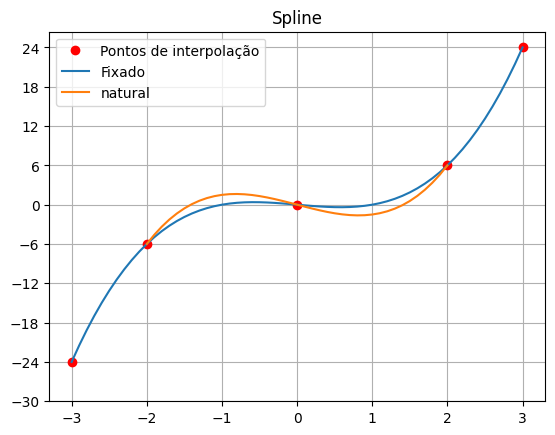

In [35]:
#Função f(x)
x = [i/10 for i in range(-30,31)]
f = [i*(i-1)*(i+1) for i in x]

#Pontos para interpolação
x_interpolacao = [-3,-2,0,2,3]
y_interpolacao = [-24,-6,0,6,24]

#Função f(x)
#plot(x, f, '--', label = 'Função')

#Pontos para interpolação
plot(x_interpolacao, y_interpolacao, 'ro', label='Pontos de interpolação')

# Pontos da curva de interpolação
y_spline = [Spline_Cubica(x_interpolacao, y_interpolacao, False, 'fixado', valores = [26,26], valor = i) for i in x]
y_spline_ = [Spline_Cubica(x_interpolacao[1:-1], y_interpolacao[1:-1], False, 'natural', valores = [-18,18], valor = i) for i in x]
plot(x, y_spline, label = 'Fixado')
plot(x, y_spline_, label = 'natural')

# Paramêtros do gráfico
title('Spline')
yticks([i for i in range(-30,30,6)])
grid(True)

legend()
show()

Na próxima atualização, a abordagem do modelo `Spline_Cubica`, atualmente implementada como função, será convertida para uma estrutura de classe (`Class`) em Python. Essa mudança permitirá a criação de métodos específicos para o cálculo dos coeficientes das splines e para a determinação de valores específicos."